### Imports

In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

# Altair
import altair as alt
alt.renderers.enable("notebook")

### Removes warnings that occassionally show up
import warnings
warnings.filterwarnings("ignore")

### Sample

In [53]:
size = (50, 50)

data1 = np.random.uniform(0, 10, size=size)
data2 = np.random.uniform(0, 10, size=size)

systems = [data1, data2]

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=("K Space", "Picture Space"))

for i, system in enumerate(systems):
    trace = go.Heatmap(z=system,
                       colorscale=[[0, "rgb(50, 235, 50)"], [1, "rgb(50, 50, 235)"]],
                       showlegend=False,
                       showscale=False)
    fig.append_trace(trace, 1, i+1)

fig["layout"]["autosize"] = True

for axis in ("xaxis1", "xaxis2", "yaxis1", "yaxis2"):
    fig.layout[axis]["autorange"] = True
    fig.layout[axis]["ticks"] = ''
    for trait in ("showgrid", "zeroline", "showline", "showticklabels"):
        fig.layout[axis][trait] = False
        
iplot(fig);

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### bad approach

Check the math, [this](http://fourier.eng.hmc.edu/e101/lectures/Image_Processing/node6.html) seems like a great resource to get the math right

In [65]:
left, right = -100, 100
down, up = -100, 100
resolution = 100
size = (50, 50)

width = np.linspace(start = left, stop = right, num = resolution)
height = np.linspace(start = down, stop = up, num = resolution)

x = pd.DataFrame({"x": width, "id": 1})
y = pd.DataFrame({"y": height, "id": 1})

result = pd.merge(left = x, right = y, how = "outer", on = "id").drop("id", axis=1)
result["space"] = 0

### K Space encoding
### (x, y, amplitude)
data1 = [(1, 0.01, 0.01)]

for wave in data1:
    result["space"] += wave[2] * np.sin((result["x"] * wave[0]) + (result["y"] * wave[1]))

# pltx = result["x"]
# plty = result["space"]
# plt.plot(pltx, plty, ".")
# plt.show()

trace = go.Heatmap(
    x = result["x"],
    y = result["y"],
    z = result["space"],
)

fig = dict(data=[trace])
iplot(fig)

### matplotlib approach

Same as above, but visualize with matplotlib instead of plotly

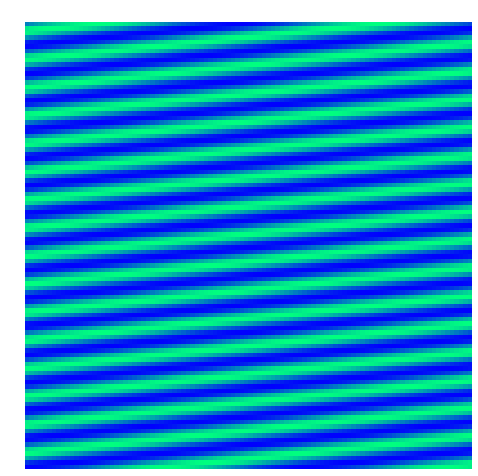

In [55]:
left, right = -100, 100
down, up = -100, 100
resolution = 100
size = (100, 100)
mid = 25

result = np.zeros(shape = size)

### K Space encoding
### (x, y, amplitude)
data1 = [(1, 0.1, 0.01)]

for wave in data1:
    for i in range(len(result)):
        for j in range(len(result)):
            result[i][j] += wave[2] * np.sin((i * wave[0]) + (j * wave[1]))

plt.figure(figsize=(8, 8))
plt.matshow(result, cmap="winter", fignum=1)
plt.axis('off');